# 6章 アルゴリズムチェーンとパイプライン

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import mglearn

In [2]:
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# データをロードして分割
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

# 訓練データの最小値と最大値を計算
scaler = MinMaxScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

svm = SVC()

svm.fit(X_train_scaled, y_train)
X_test_scaled = scaler.transform(X_test)
svm.score(X_test_scaled, y_test)

0.951048951048951

In [3]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=5)
grid.fit(X_train_scaled, y_train)

print("Best cross-validation accuracy: {:.2f}".format(grid.best_score_))
print("Best set score: {:.2f}".format(grid.score(X_test_scaled, y_test)))
print("Best parameters: ", grid.best_params_)

Best cross-validation accuracy: 0.98
Best set score: 0.97
Best parameters:  {'C': 1, 'gamma': 1}


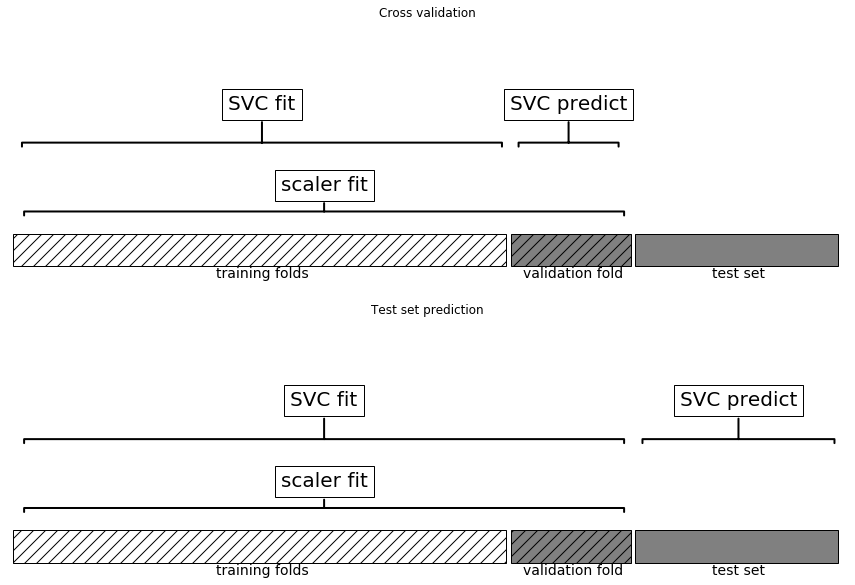

In [4]:
mglearn.plots.plot_improper_processing()

In [5]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([("scaler", MinMaxScaler()), ("svm", SVC())])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.951048951048951

# 6.3 パイプラインを用いたグリッドサーチ

In [6]:
param_grid = {"svm__C":[0.001, 0.01, 0.1, 1, 10, 100],
             "svm__gamma":[0.001, 0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)
print(grid.best_score_)
print(grid.score(X_test, y_test))
print(grid.best_params_)

0.9812206572769953
0.972027972027972
{'svm__C': 1, 'svm__gamma': 1}


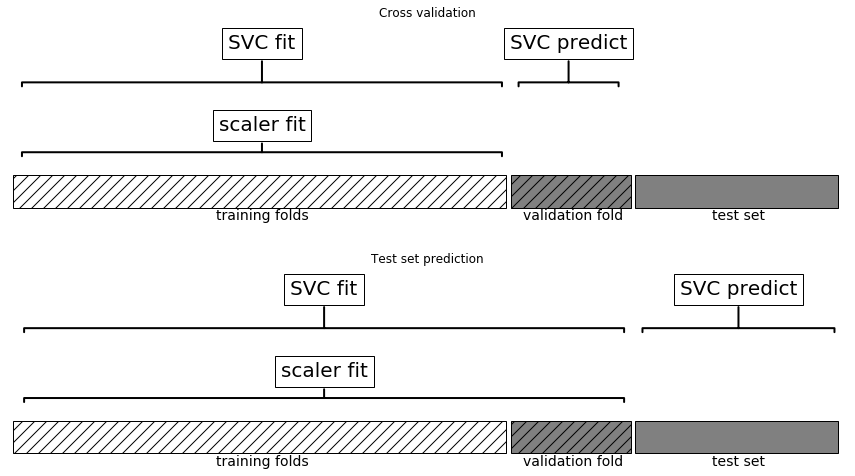

In [7]:
mglearn.plots.plot_proper_processing()

In [8]:
rnd = np.random.RandomState(seed=0)
X = rnd.normal(size=(100, 10000))
y = rnd.normal(size=(100,))
X.shape, y.shape

((100, 10000), (100,))

In [9]:
X[:5]

array([[ 1.76405235e+00,  4.00157208e-01,  9.78737984e-01, ...,
         5.16872179e-01, -3.29206931e-02,  1.29811143e+00],
       [-2.02117027e-01, -8.33231001e-01,  1.73360025e+00, ...,
        -5.72592527e-02, -1.05893126e+00, -3.26528442e-01],
       [ 3.30045889e-01, -4.79979434e-04,  8.18115898e-01, ...,
        -1.51127631e+00,  9.76843833e-01,  1.25550065e+00],
       [ 3.71232144e-01,  3.04783891e-01,  5.04124602e-01, ...,
         1.68985759e+00,  1.99966492e-01, -1.22433070e+00],
       [-1.93950036e+00,  7.38850454e-01,  1.39468453e+00, ...,
        -2.50341767e-01,  5.84727988e-01, -1.25082696e+00]])

In [10]:
y[:5]

array([ 0.51424689,  1.11286451,  0.67502449, -0.56055678, -0.83489841])

In [11]:
from sklearn.feature_selection import SelectPercentile, f_regression

select = SelectPercentile(score_func=f_regression, percentile=5).fit(X, y)
X_selected = select.transform(X)
X_selected.shape

(100, 500)

In [12]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge

np.mean(cross_val_score(Ridge(), X_selected, y, cv=5))

0.9057953065239822

In [13]:
pipe = Pipeline([("select", SelectPercentile(score_func=f_regression,
                                           percentile=5)),
                ("ridge", Ridge())])
np.mean(cross_val_score(pipe, X, y, cv=5))

-0.24655422384952813

# 6.4 汎用パイプラインインターフェイス

In [14]:
from sklearn.pipeline import make_pipeline

pipe_long = Pipeline([("scaler", MinMaxScaler()), ("svm", SVC(C=100))])
pipe_short = make_pipeline(MinMaxScaler(), SVC(C=100))

pipe_short.steps

[('minmaxscaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
 ('svc', SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False))]

In [15]:
pipe_short.get_params()

{'memory': None,
 'minmaxscaler': MinMaxScaler(copy=True, feature_range=(0, 1)),
 'minmaxscaler__copy': True,
 'minmaxscaler__feature_range': (0, 1),
 'steps': [('minmaxscaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
  ('svc', SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
     decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
     max_iter=-1, probability=False, random_state=None, shrinking=True,
     tol=0.001, verbose=False))],
 'svc': SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
   decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
   max_iter=-1, probability=False, random_state=None, shrinking=True,
   tol=0.001, verbose=False),
 'svc__C': 100,
 'svc__cache_size': 200,
 'svc__class_weight': None,
 'svc__coef0': 0.0,
 'svc__decision_function_shape': 'ovr',
 'svc__degree': 3,
 'svc__gamma': 'auto',
 'svc__kernel': 'rbf',
 'svc__max_iter': -1,
 'svc__probability': False,
 'svc__random_state': None,
 'svc__shrinking':

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

pipe = make_pipeline(StandardScaler(), PCA(n_components=2), StandardScaler())
pipe.steps

[('standardscaler-1',
  StandardScaler(copy=True, with_mean=True, with_std=True)),
 ('pca',
  PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)),
 ('standardscaler-2',
  StandardScaler(copy=True, with_mean=True, with_std=True))]

In [17]:
pipe.fit(cancer.data)
components = pipe.named_steps["pca"].components_
print(components)

[[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


In [18]:
components.shape

(2, 30)

In [19]:
from sklearn.linear_model import LogisticRegression
pipe = make_pipeline(StandardScaler(), LogisticRegression())
param_grid = {"logisticregression__C":[0.01, 0.1, 1, 10, 100]}

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                   random_state=4)
print(X_train.shape)
grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(X_train, y_train)

grid.best_estimator_

(426, 30)


Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logisticregression', LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [20]:
grid.best_estimator_.named_steps["logisticregression"]

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [21]:
grid.best_estimator_.named_steps["logisticregression"].coef_

array([[-0.38856355, -0.37529972, -0.37624793, -0.39649439, -0.11519359,
         0.01709608, -0.3550729 , -0.38995414, -0.05780518,  0.20879795,
        -0.49487753, -0.0036321 , -0.37122718, -0.38337777, -0.04488715,
         0.19752816,  0.00424822, -0.04857196,  0.21023226,  0.22444999,
        -0.54669761, -0.52542026, -0.49881157, -0.51451071, -0.39256847,
        -0.12293451, -0.38827425, -0.4169485 , -0.32533663, -0.13926972]])

# 6.5 前処理ステップとモデルパラメータに対するグリッドサーチ

In [25]:
from sklearn.datasets import load_boston

boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target,
                                                   random_state=0)
X_train[:6], y_train[:6]

(array([[1.91330e-01, 2.20000e+01, 5.86000e+00, 0.00000e+00, 4.31000e-01,
         5.60500e+00, 7.02000e+01, 7.95490e+00, 7.00000e+00, 3.30000e+02,
         1.91000e+01, 3.89130e+02, 1.84600e+01],
        [1.03280e-01, 2.50000e+01, 5.13000e+00, 0.00000e+00, 4.53000e-01,
         5.92700e+00, 4.72000e+01, 6.93200e+00, 8.00000e+00, 2.84000e+02,
         1.97000e+01, 3.96900e+02, 9.22000e+00],
        [1.04690e-01, 4.00000e+01, 6.41000e+00, 1.00000e+00, 4.47000e-01,
         7.26700e+00, 4.90000e+01, 4.78720e+00, 4.00000e+00, 2.54000e+02,
         1.76000e+01, 3.89250e+02, 6.05000e+00],
        [8.71675e+00, 0.00000e+00, 1.81000e+01, 0.00000e+00, 6.93000e-01,
         6.47100e+00, 9.88000e+01, 1.72570e+00, 2.40000e+01, 6.66000e+02,
         2.02000e+01, 3.91980e+02, 1.71200e+01],
        [1.08342e+01, 0.00000e+00, 1.81000e+01, 0.00000e+00, 6.79000e-01,
         6.78200e+00, 9.08000e+01, 1.81950e+00, 2.40000e+01, 6.66000e+02,
         2.02000e+01, 2.15700e+01, 2.57900e+01],
        [1.0574

In [28]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [31]:
from sklearn.preprocessing import PolynomialFeatures

pipe = make_pipeline(StandardScaler(), PolynomialFeatures(), Ridge())
param_grid = {'polynomialfeatures__degree':[1,2,3],
             'ridge__alpha':[0.001, 0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5, n_jobs=-1)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('polynomialfeatures', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('ridge', Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'polynomialfeatures__degree': [1, 2, 3], 'ridge__alpha': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

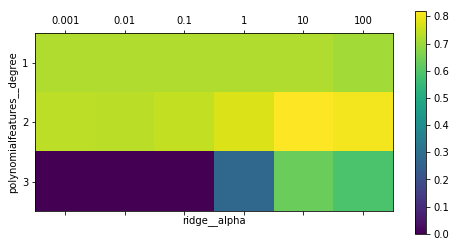

In [38]:
plt.matshow(grid.cv_results_['mean_test_score'].reshape(3, -1),
           vmin=0, cmap="viridis")
plt.xlabel("ridge__alpha")
plt.ylabel("polynomialfeatures__degree")
plt.xticks(range(len(param_grid['ridge__alpha'])), param_grid['ridge__alpha'])
plt.yticks(range(len(param_grid['polynomialfeatures__degree'])),
           param_grid['polynomialfeatures__degree'])
plt.colorbar()

In [32]:
grid.cv_results_

/home/yuki/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/yuki/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/yuki/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/yuki/.local/lib/python3.6/site-packages/sk

{'mean_fit_time': array([0.00276804, 0.00209341, 0.00122824, 0.00098343, 0.00085492,
        0.00112438, 0.01698017, 0.01576109, 0.01753287, 0.01612678,
        0.01520052, 0.01256909, 0.0402853 , 0.03651099, 0.04371858,
        0.04830837, 0.03617201, 0.03271656]),
 'mean_score_time': array([0.00086551, 0.00070548, 0.00055895, 0.00042539, 0.00036893,
        0.00050807, 0.00314775, 0.00160732, 0.00166478, 0.00166101,
        0.00162058, 0.00158525, 0.0199265 , 0.02072682, 0.01931443,
        0.02488732, 0.02106919, 0.01758933]),
 'mean_test_score': array([   0.72169353,    0.721697  ,    0.72173126,    0.7220378 ,
           0.72307143,    0.70772151,    0.73864353,    0.73756794,
           0.7441318 ,    0.77682137,    0.82103778,    0.80630064,
        -181.61396355,  -49.22387802,   -3.07615973,    0.27656439,
           0.63362711,    0.58780662]),
 'mean_train_score': array([0.77280276, 0.77280276, 0.77280247, 0.77277597, 0.77120515,
        0.74246573, 0.95894521, 0.95865728, 0

In [33]:
grid.cv_results_['mean_test_score']

array([   0.72169353,    0.721697  ,    0.72173126,    0.7220378 ,
          0.72307143,    0.70772151,    0.73864353,    0.73756794,
          0.7441318 ,    0.77682137,    0.82103778,    0.80630064,
       -181.61396355,  -49.22387802,   -3.07615973,    0.27656439,
          0.63362711,    0.58780662])

In [47]:
grid.best_params_

{'polynomialfeatures__degree': 2, 'ridge__alpha': 10}

In [50]:
grid.score(X_test, y_test)

0.7673580350306168

In [52]:
param_grid = {'ridge__alpha':[0.001, 0.01, 0.1, 1, 10, 100]}
pipe = make_pipeline(StandardScaler(), Ridge())
grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(X_train, y_train)
grid.score(X_test, y_test)

0.6271780381774581

# 6.6 グリッドサーチによるモデルの選択

In [59]:
pipe = Pipeline([('preprocessing', StandardScaler()), ('classifier', SVC())])

from sklearn.ensemble import RandomForestClassifier

param_grid = [{'classifier':[SVC()], 'preprocessing':[StandardScaler(), None],
              'classifier__gamma':[0.001, 0.01, 0.1, 1, 10, 100],
              'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]},
             {'classifier':[RandomForestClassifier(n_estimators=100)],
             'preprocessing':[None], 'classifier__max_features':[1,2,3]}]
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                   random_state=0)
grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(X_train, y_train)
grid.best_params_


{'classifier': SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
   decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
   max_iter=-1, probability=False, random_state=None, shrinking=True,
   tol=0.001, verbose=False),
 'classifier__C': 10,
 'classifier__gamma': 0.01,
 'preprocessing': StandardScaler(copy=True, with_mean=True, with_std=True)}

In [61]:
grid.best_score_

0.9859154929577465

In [62]:
grid.score(X_test, y_test)

0.9790209790209791